# Bilbiotecas principais

In [16]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

# Visualização
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# retirar avisos
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("PEDE_PASSOS_DATASET_FIAP.csv", sep= ";") # sobre df principal

# Passo 1: Criação de uma base tratada, transpondo informações por ano de pesquisa (redução do número de colunas)

## 1.1 - Separação de dados por ano

In [84]:
df_2020 = df[[col for col in df.columns if "2020" in col]].copy() #filtra as colunas com "_2020" e adiciona em um novo df
df_2020.columns = [col.replace("_2020", "") for col in df_2020.columns] # retira caractere numérico da coluna para padronizar
df_2020["NOME"] = df["NOME"] #adiciona identificador do aluno
df_2020["ANO_PESQUISA"] = 2020 #adiciona coluna de ano
cols_nulo_2020 = df_2020.columns.difference(['NOME', 'ANO_PESQUISA']) # excluir
df_2020 = df_2020.dropna(how='all', subset=cols_nulo_2020).reset_index(drop=True) # Excluir linhas onde todas as colunas no subset especificado são NaN
df_2020[['FASE', 'TURMA']] = df_2020['FASE_TURMA'].str.extract('(\d+)(\D+)') # Separação de dados entre "FASE_TURMA" no df_2020 para ficar similar aos demais
df_2020 = df_2020.drop(['FASE_TURMA'], axis=1) #excluindo coluna inicial

# processos se repetindo para anos de 2021 e 2022
df_2021 = df[[col for col in df.columns if "2021" in col]].copy() 
df_2021.columns = [col.replace("_2021", "") for col in df_2021.columns]
df_2021["NOME"] = df["NOME"] 
df_2021["ANO_PESQUISA"] = 2021
cols_nulo_2021 = df_2021.columns.difference(['NOME', 'ANO_PESQUISA'])
df_2021 = df_2021.dropna(how='all', subset=cols_nulo_2021).reset_index(drop=True) 


df_2022 = df[[col for col in df.columns if "2022" in col]].copy() 
df_2022.columns = [col.replace("_2022", "") for col in df_2022.columns]
df_2022["NOME"] = df["NOME"]
df_2022["ANO_PESQUISA"] = 2022
cols_nulo_2022 = df_2022.columns.difference(['NOME', 'ANO_PESQUISA'])
df_2022 = df_2022.dropna(how='all', subset=cols_nulo_2022).reset_index(drop=True)

## 1.2 - Padronização de colunas e criação de base unificada

In [85]:
# Cria lista com nomes de colunas de cada df
col_2020 = list(df_2020.columns)
col_2021 = list(df_2021.columns)
col_2022 = list(df_2022.columns)

# Nova lista que une as colunas dos 3 dataframes em uma única lista, excluindo valores duplicados
colunas_unicas = list(set(col_2020 + col_2021 + col_2022)) 

# função para validar quais colunas não estão presentes no dataframe e adiciona
def adicionar_colunas_faltantes(df, colunas_unicas):
    for col in colunas_unicas:
        if col not in df.columns:
            df[col] = None  # deixa valores da coluna zerados
            
# aplicação da função em cada df, adicionando as colunas
adicionar_colunas_faltantes(df_2020, colunas_unicas)
adicionar_colunas_faltantes(df_2021, colunas_unicas)
adicionar_colunas_faltantes(df_2022, colunas_unicas)

# Unindo bases em novo df
df_final_passos = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)
print("Total linhas: ", df_final_passos.shape[0])
print("Total colunas: ", len(df_final_passos.columns))
df_final_passos.columns

Total linhas:  2276
Total colunas:  42


Index(['INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO', 'ANOS_PM', 'PONTO_VIRADA',
       'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG', 'DESTAQUE_IDA',
       'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN', 'NOME',
       'ANO_PESQUISA', 'FASE', 'TURMA', 'INDICADO_BOLSA',
       'SINALIZADOR_INGRESSANTE', 'CF', 'REC_EQUIPE_4', 'DEFASAGEM',
       'REC_EQUIPE_2', 'BOLSISTA', 'QTD_AVAL', 'REC_AVA_4', 'REC_EQUIPE_3',
       'ANO_INGRESSO', 'CT', 'REC_AVA_2', 'NOTA_MAT', 'NIVEL_IDEAL',
       'REC_AVA_3', 'REC_AVA_1', 'REC_EQUIPE_1', 'CG', 'NOTA_PORT',
       'NOTA_ING'],
      dtype='object')

## 1.3 - Ajustes de colunas (valores, tipos, etc)

### Criar novo df com apenas colunas relevantes (métricas e notas)

In [91]:
df_final_filtrado = df_final_passos[['NOME','ANO_PESQUISA','ANO_INGRESSO','INSTITUICAO_ENSINO_ALUNO','BOLSISTA','ANOS_PM','FASE','TURMA','NIVEL_IDEAL','PONTO_VIRADA','INDE','PEDRA','IEG','IDA','IPV','IAA','IPS','IPP','IAN','CF','CG','CT','NOTA_PORT','NOTA_MAT','NOTA_ING']]
excluir_outlier = df_final_filtrado[df_final_filtrado['NOME'] == 'ALUNO-1259'].index
df_final_filtrado = df_final_filtrado.drop(excluir_outlier)
df_final_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2275 entries, 0 to 2275
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME                      2275 non-null   object 
 1   ANO_PESQUISA              2275 non-null   int64  
 2   ANO_INGRESSO              862 non-null    float64
 3   INSTITUICAO_ENSINO_ALUNO  1413 non-null   object 
 4   BOLSISTA                  862 non-null    object 
 5   ANOS_PM                   727 non-null    object 
 6   FASE                      2275 non-null   object 
 7   TURMA                     2275 non-null   object 
 8   NIVEL_IDEAL               1548 non-null   object 
 9   PONTO_VIRADA              2249 non-null   object 
 10  INDE                      2275 non-null   object 
 11  PEDRA                     2275 non-null   object 
 12  IEG                       2275 non-null   object 
 13  IDA                       2275 non-null   object 
 14  IPV          

### Tornar colunas de métricas para float

In [92]:
colunas = ['IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN', 'ANOS_PM', 'INDE']
for coluna in colunas:
    df_final_filtrado[coluna] = pd.to_numeric(df_final_filtrado[coluna], errors='coerce')

### Ajuste dados Nível ideal

In [93]:
dict_nivel_ideal = {
    "ALFA  (2o e 3o ano)"       :	0.5, 
    "ALFA  (2º e 3º ano)"       :	0.5,
    "Nível 1 (4o ano)"          :	1,
    "Fase 1 (4º ano)"           :	1,
    "Nível 2 (5o e 6o ano)"     :	2,
    "Fase 2 (5º e 6º ano)"      :	2,
    "Nível 3 (7o e 8o ano)"     :	3,
    "Fase 3 (7º e 8º ano)"      :	3,
    "Fase 4 (9º ano)"           :	4,
    "Nível 4 (9o ano)"          :	4,
    "Fase 5 (1º EM)"            :	5,
    "Nível 5 (1o EM)"           :	5,
    "Fase 6 (2º EM)"            :	6,
    "Nível 6 (2o EM)"           :	6,
    "Fase 7 (3º EM)"            :	7,
    "Nível 7 (3o EM)"           :	7,
    "Nível 8 (Universitários)"  :	8,
    "Fase 8 (Universitários)"   :	8
}

df_final_filtrado['NIVEL_IDEAL'] = df_final_filtrado['NIVEL_IDEAL'].map(dict_nivel_ideal).fillna(0).astype(float) # trata valores nulos como 0
df_final_filtrado['NIVEL_IDEAL'].value_counts()

NIVEL_IDEAL
0.0    729
2.0    396
3.0    378
1.0    165
4.0    158
0.5    124
5.0    119
6.0     93
7.0     84
8.0     29
Name: count, dtype: int64

### Criar nova coluna para bolsistas

In [94]:
# tratar e criar nova coluna para bolsita, considerando dados de 2020 a 2022 da coluna "INSTITUICAO_ENSINO_ALUNO_2020" e "BOLSISTA"
condicao_bolsista = df_final_filtrado['BOLSISTA'] == 'Sim'  
condicao_instituicao = df_final_filtrado['INSTITUICAO_ENSINO_ALUNO'].notna() & (df_final_filtrado['INSTITUICAO_ENSINO_ALUNO'] != 'Escola Pública')

df_final_filtrado['BOLSISTA_GERAL'] = (condicao_bolsista | condicao_instituicao).astype(int)
df_final_filtrado = df_final_filtrado.drop(["BOLSISTA"], axis = 1)
df_final_filtrado["BOLSISTA_GERAL"].value_counts()

BOLSISTA_GERAL
0    1909
1     366
Name: count, dtype: int64

### Nova coluna tratada para anos em que o aluno está na Passos

In [95]:
# converter tipo de dado das colunas "ANO_INGRESSO" e "ANOS_PM"  para int (atualmente como float)
df_final_filtrado['ANO_INGRESSO'] = pd.to_numeric(df_final_filtrado['ANO_INGRESSO'], errors='coerce').fillna(0).astype(int)
df_final_filtrado['ANOS_PM'] = pd.to_numeric(df_final_filtrado['ANOS_PM'], errors='coerce').fillna(0).astype(int)

#2021 não tem dados de "ANOS_PM" OU "ANO_INGRESSO", vou criar um dicionário com as informações de 2020 e 2021 por aluno para mapear melhor essa info
dados_2022 = df_final_filtrado[df_final_filtrado['ANO_PESQUISA'] == 2022]
dict_nome_ano_ingresso = dados_2022.set_index('NOME')['ANO_INGRESSO'].to_dict()

dados_2020 = df_final_filtrado[df_final_filtrado['ANO_PESQUISA'] == 2020]
dict_nome_anos_pm = dados_2020.set_index('NOME')['ANOS_PM'].to_dict()

In [96]:
# Função para atualizar 'ANO_INGRESSO' para linhas de 2021 baseado no dicionário
def atualizar_ano_ingresso(row):
    if row['ANO_PESQUISA'] == 2021 and row['NOME'] in dict_nome_ano_ingresso:
        return dict_nome_ano_ingresso[row['NOME']]
    else:
        return row['ANO_INGRESSO']

df_final_filtrado['ANO_INGRESSO'] = df_final_filtrado.apply(atualizar_ano_ingresso, axis=1)


# Função para atualizar 'ANO_PM' para linhas de 2021 baseado no dicionário de 2020 adicionando 1 ano, caso "ANO_INGRESSO" seja igual a 0
def atualizar_anos_pm(row):
    if row['ANO_PESQUISA'] == 2021 and row['ANO_INGRESSO'] == 0 and row['NOME'] in dict_nome_anos_pm:
        return dict_nome_anos_pm[row['NOME']] + 1
    else:
        return row['ANOS_PM']

df_final_filtrado['ANOS_PM'] = df_final_filtrado.apply(atualizar_anos_pm, axis=1)

In [97]:
# criar nova coluna mantendo dados de 2020 e fazendo o cálculo entre "ano pesquisa" e "ano_ingresso" para 2021 e 2022
df_final_filtrado['ANOS_COMO_ALUNO'] = df_final_filtrado.apply(lambda row: row['ANOS_PM'] if row['ANO_INGRESSO'] == 0 else row['ANO_PESQUISA'] - row['ANO_INGRESSO'], axis=1).astype(int)
df_final_filtrado = df_final_filtrado.drop(["ANO_INGRESSO", "ANOS_PM"], axis = 1)
df_final_filtrado["ANOS_COMO_ALUNO"].value_counts(normalize=True)*100

ANOS_COMO_ALUNO
0    33.186813
1    23.164835
2    17.406593
3    14.109890
4     7.384615
5     3.472527
6     1.274725
Name: proportion, dtype: float64

## 1.4 - Exclusão de nados com "#NULO!" e ajuste do ponto de virada

In [98]:
df_final_filtrado = df_final_filtrado.loc[df_final_filtrado["PEDRA"] != "#NULO!"]
df_final_filtrado = df_final_filtrado.loc[df_final_filtrado["PONTO_VIRADA"]!= "#NULO!"]

dict_pv = { "Não":0, "Sim":1, "#NULO!": None}
df_final_filtrado['PONTO_VIRADA'] = df_final_filtrado['PONTO_VIRADA'].map(dict_pv).astype(float)
df_final_filtrado["PONTO_VIRADA"].value_counts()

PONTO_VIRADA
0.0    1932
1.0     315
Name: count, dtype: int64

# Passo 2: Análise métricas bolsistas versus não-bolsistas

### Análise de correlação entre métricas

<Axes: >

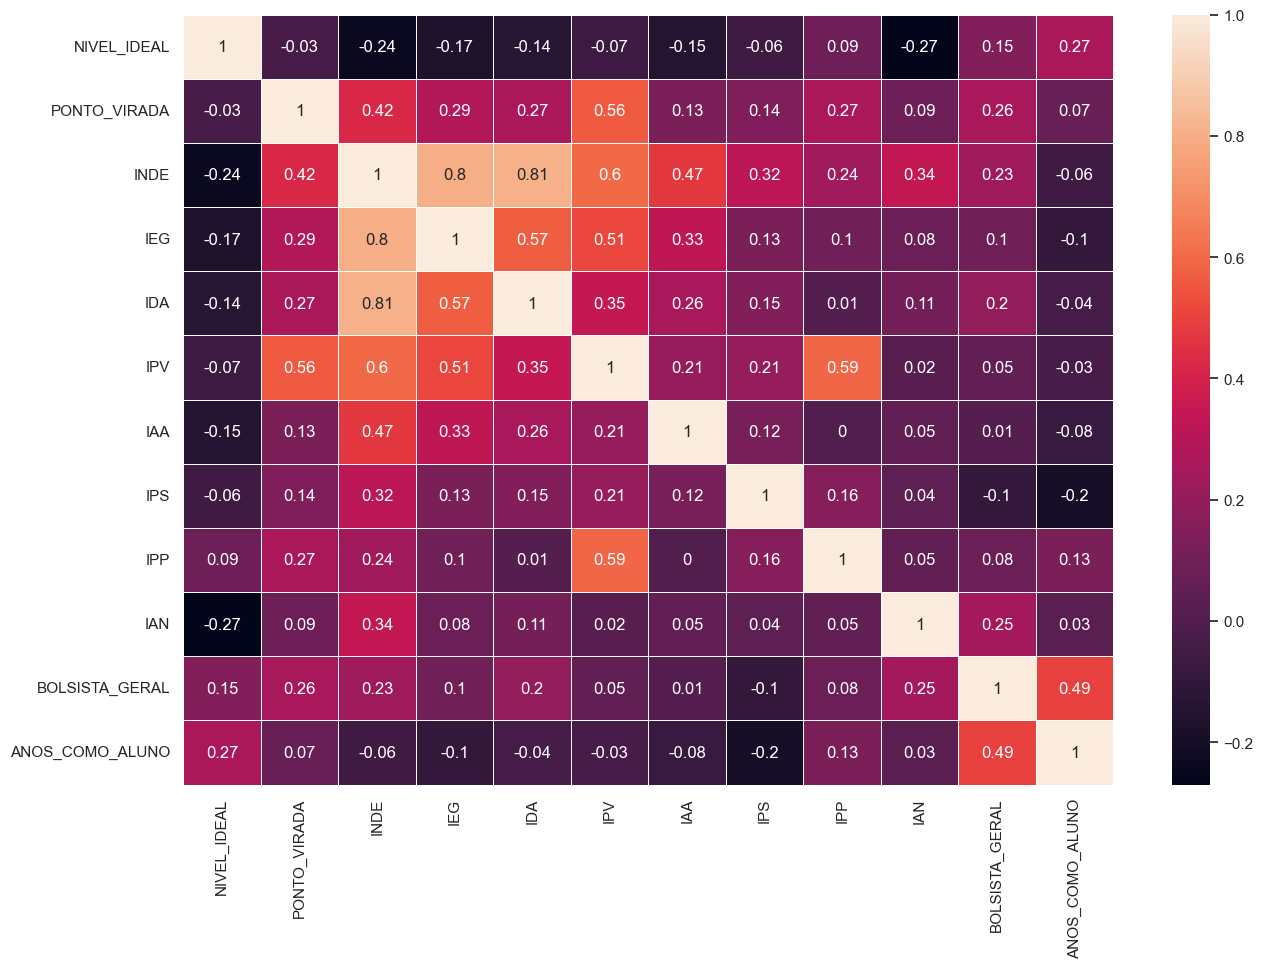

In [59]:
df_filtrado = df_final_filtrado[['NIVEL_IDEAL', 'PONTO_VIRADA', 'INDE', 'IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN', 'BOLSISTA_GERAL', 'ANOS_COMO_ALUNO']]
correlation_matrix = df_filtrado.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Pela análise acima, não é possível identificar uma correlação forte entre as principais métricas de avaliação e outras colunas numéricas. Isso indica que 

## Progressão por ano

In [107]:
print("Porcentagem de alunos bolsistas :", df_final_filtrado["BOLSISTA_GERAL"].value_counts(normalize=True)*100, "\n")
print("Total de alunos bolsistas :", df_final_filtrado["BOLSISTA_GERAL"].value_counts())

Porcentagem de alunos bolsistas : BOLSISTA_GERAL
0    83.897932
1    16.102068
Name: proportion, dtype: float64 

Total de alunos bolsistas : BOLSISTA_GERAL
0    1907
1     366
Name: count, dtype: int64


In [108]:
media_anos_por_bolsista = df_final_filtrado.groupby('BOLSISTA_GERAL')['ANOS_COMO_ALUNO'].mean()
media_anos_por_bolsista

BOLSISTA_GERAL
0    1.223912
1    3.240437
Name: ANOS_COMO_ALUNO, dtype: float64

Ao analisar o tempo de permanência, identificamos que alunos que se tornam bolsitas tendem a ficar mais tempo na Passos Mágicos - bolsistas ficam, em média 3 anos enquanto não bolsistas ficam cerca de 1 ano.


Para aprofundar, analisamos como ocorria a progressão das principais métricas ao longo das fases por cada perfil de aluno (bolsista ou não).

No geral, o aluno bolsista tende a ter uma nota mais alta ao longo das fases do que não bolsistas. Em alguns casos, a variação entre as médias é expressiva. 
Outro ponto que chama atenção é que enquanto as notas dos bolsistas se mantem mais estáveis ao longo das fases, a média de não bolsistas cao principalmente entre as fases 2 e 6.

Esse comportamento acontece principalmente nas métricas INDE, IEG, IDA e em menor proporção em IPV.

In [73]:
fig = px.box(df_final_filtrado, 
             x='FASE', 
             y='INDE', 
             color='BOLSISTA_GERAL', 
             labels={'INDE': 'Média de INDE', 'FASE': 'Fase', 'BOLSISTA_GERAL': 'Bolsista'}, 
             title='Média de INDE por Fase e Status de Bolsista',
             category_orders={
                 'BOLSISTA_GERAL': ['Não', 'Sim'],
                 'FASE': ['0', '1', '2', '3', '4', '5', '6', '7', '8']})
fig.update_layout(width=1000, height=500)
fig.show()

In [77]:
fig = px.box(df_final_filtrado, 
             x='FASE', 
             y='IEG', 
             color='BOLSISTA_GERAL', 
             labels={'IEG': 'Média de IEG', 'FASE': 'Fase', 'BOLSISTA_GERAL': 'Bolsista'}, 
             title='Média de IEG por Fase e Status de Bolsista',
             category_orders={
                 'BOLSISTA_GERAL': ['Não', 'Sim'],
                 'FASE': ['0', '1', '2', '3', '4', '5', '6', '7', '8']
                 })
fig.update_layout(width=1000, height=500)
fig.show()

In [75]:
fig = px.box(df_final_filtrado, 
             x='FASE', 
             y='IDA', 
             color='BOLSISTA_GERAL', 
             labels={'IDA': 'Média de IDA', 'FASE': 'Fase', 'BOLSISTA_GERAL': 'Bolsista'}, 
             title='Média de IDA por Fase e Status de Bolsista',
             category_orders={
                 'BOLSISTA_GERAL': ['Não', 'Sim'],
                 'FASE': ['0', '1', '2', '3', '4', '5', '6', '7', '8']})
fig.update_layout(width=1000, height=500)
fig.show()

In [71]:
fig = px.box(df_final_filtrado, 
             x='FASE', 
             y='IPV', 
             color='BOLSISTA_GERAL', 
             labels={'IPV': 'Média de IPV', 'FASE': 'Fase', 'BOLSISTA_GERAL': 'Bolsista'}, 
             title='Média de IPV por Fase e Status de Bolsista',
             category_orders={
                 'BOLSISTA_GERAL': ['Não', 'Sim'],
                 'FASE': ['0', '1', '2', '3', '4', '5', '6', '7', '8']})
fig.update_layout(width=1000, height=500)
fig.show()

In [69]:
fig = px.box(df_final_filtrado, 
             x='FASE', 
             y='IPS', 
             color='BOLSISTA_GERAL', 
             labels={'IPS': 'Média de IPP', 'FASE': 'Fase', 'BOLSISTA_GERAL': 'Bolsista'}, 
             title='Média de IPP por Fase e Status de Bolsista',
             category_orders={
                 'BOLSISTA_GERAL': ['Não', 'Sim'],
                 'FASE': ['0', '1', '2', '3', '4', '5', '6', '7', '8']})
fig.update_layout(width=1000, height=500)
fig.show()

In [70]:
fig = px.box(df_final_filtrado, 
             x='FASE', 
             y='IPP', 
             color='BOLSISTA_GERAL', 
             labels={'IPP': 'Média de IPP', 'FASE': 'Fase', 'BOLSISTA_GERAL': 'Bolsista'}, 
             title='Média de IPP por Fase e Status de Bolsista',
             category_orders={
                 'BOLSISTA_GERAL': ['Não', 'Sim'],
                 'FASE': ['0', '1', '2', '3', '4', '5', '6', '7', '8']})
fig.update_layout(width=1000, height=500)
fig.show()

## Tentativa de criar um menu de seleção

In [83]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Define a função que atualiza o gráfico com base na métrica selecionada
def update_chart(metric):
    fig = px.box(df_final_filtrado, 
                 x='FASE', 
                 y=metric, 
                 color='BOLSISTA_GERAL', 
                 labels={metric: f'Média de {metric}', 'FASE': 'Fase', 'BOLSISTA_GERAL': 'Bolsista'}, 
                 title=f'Média de {metric} por Fase e Status de Bolsista',
                 category_orders={
                 'BOLSISTA_GERAL': ['Não', 'Sim'],
                 'FASE': ['0', '1', '2', '3', '4', '5', '6', '7', '8']
                 })
    fig.update_layout(width=1000, height=500)
    fig.show()

# Cria um dropdown para selecionar a métrica do eixo Y
metric_dropdown = widgets.Dropdown(
    options=[('Média de INDE', 'INDE'), 
             ('Média de IEG', 'IEG'),
             ('Média de IDA', 'IDA'),
             ('Média de IPV', 'IPV'),
             ('Média de IPS', 'IPS'),
             ('Média de IPP', 'IPP')],  # Adicione ou substitua as opções conforme necessário
    value='INDE',  # Valor padrão
    description='Métrica:',
)

# Mostra o dropdown e usa um observador para atualizar o gráfico quando a seleção mudar
display(metric_dropdown)

# Função para lidar com a mudança de seleção no dropdown
def on_metric_change(change):
    update_chart(change['new'])

# Adiciona o observador ao dropdown
metric_dropdown.observe(on_metric_change, names='value')

Dropdown(description='Métrica:', options=(('Média de INDE', 'INDE'), ('Média de IEG', 'IEG'), ('Média de IDA',…